In [ ]:
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
series=pd.read_csv(url,header=0,index_col=0,parse_dates=True,squeeze=True)
series.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

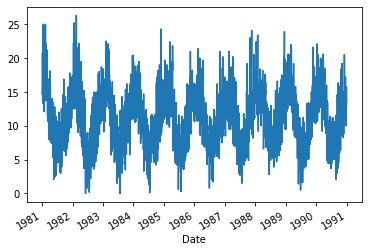

In [ ]:
series.plot()
plt.show()

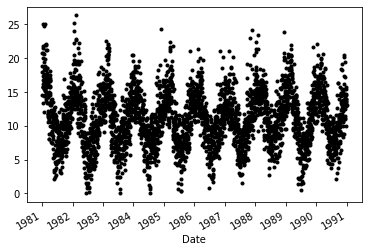

In [ ]:
series.plot(style='k.')
plt.show()

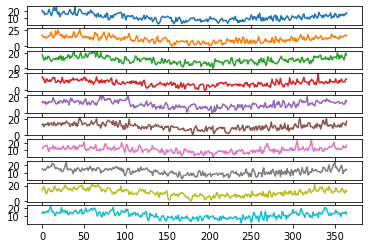

In [ ]:
groups = series.groupby(pd.Grouper(freq='A'))
years=pd.DataFrame()
for name,group in groups:
  years[name.year] = group.values
years.plot(subplots=True,legend=False)
plt.show()

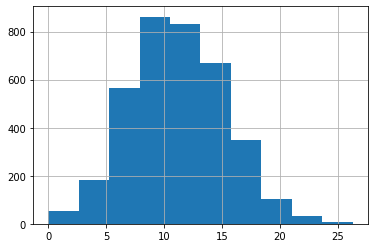

In [ ]:
series.hist()
plt.show()

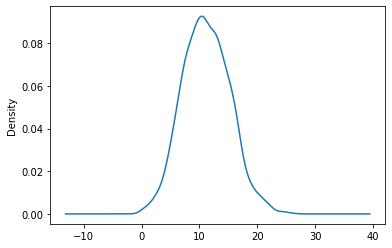

In [ ]:
series.plot(kind='kde')
plt.show()

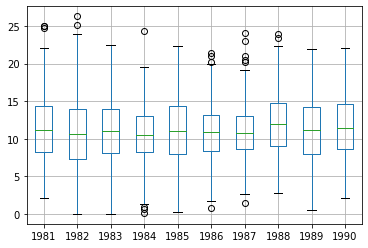

In [ ]:
groups=series.groupby(pd.Grouper(freq='A'))
years=pd.DataFrame()
for name,group in groups:
  years[name.year] = group.values
years.boxplot()
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


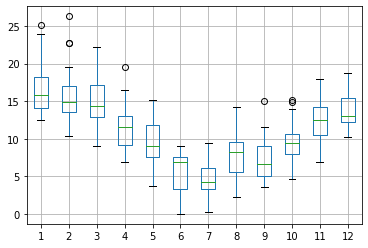

In [ ]:
one_year=series['1982']
groups=one_year.groupby(pd.Grouper(freq='M'))
months=pd.concat([pd.DataFrame(x[1].values) for x in groups],axis=1)
months=pd.DataFrame(months)
months.columns=range(1,13)
months.boxplot()
plt.show()

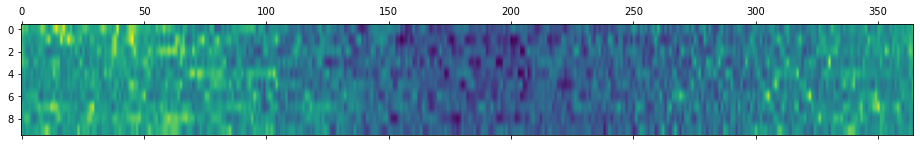

In [ ]:
groups=series.groupby(pd.Grouper(freq='A'))
years=pd.DataFrame()
for name,group in groups:
  years[name.year]=group.values
years=years.T
plt.matshow(years,interpolation=None,aspect='auto')
plt.show()

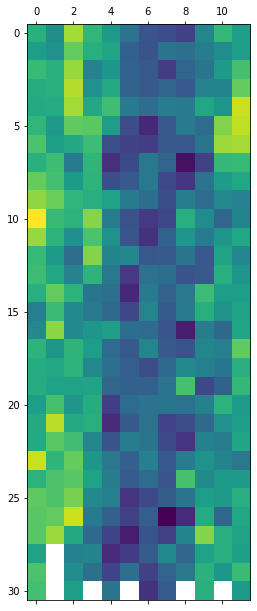

In [24]:
one_year = series['1990']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
pyplot.matshow(months, interpolation=None, aspect='auto')
pyplot.show()

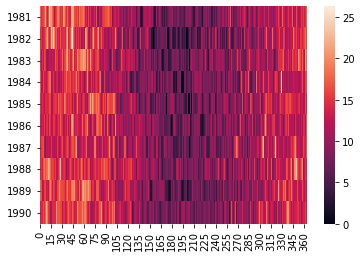

In [ ]:
import seaborn as sns
sns.heatmap(years)

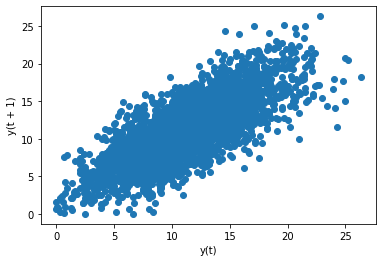

In [ ]:
pd.plotting.lag_plot(series)
plt.show()

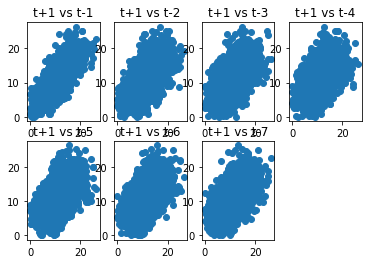

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
values = DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
 columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
 columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
 ax = pyplot.subplot(240 + i)
 ax.set_title('t+1 vs t-' + str(i))
 pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

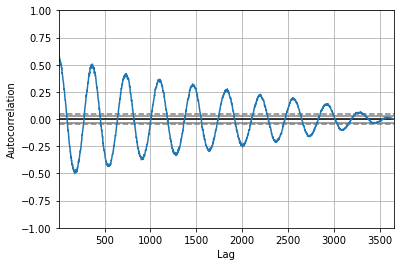

In [ ]:
pd.plotting.autocorrelation_plot(series)
plt.show()